In [11]:
import numpy as np
from glob import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.linear_model import LogisticRegression
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [12]:
# Get images' names
non_demented = glob('./data/Non_Demented/*.jpg')
mild_demented = glob('./data/Mild_Demented/*.jpg')
moderate_demented = glob('./data/Moderate_Demented/*.jpg')
very_mild_demented = glob('./data/Very_Mild_Demented/*.jpg')
num_classes = 4
image_size = (108,108)

In [13]:
def view_image(filename):
    img = mpimg.imread(filename)
    img = img[10:118, 10:118]
    plt.imshow(img)
    print(f'Image shape: {img.shape}')

# need to crop the images after the fact for better testing

Total amount of non_demented: 3200
Image shape: (108, 108)


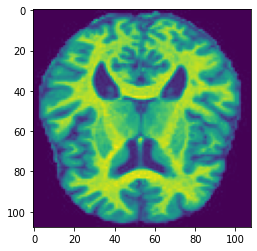

In [15]:
print(f'Total amount of non_demented: {len(non_demented)}')
view_image(non_demented[0])

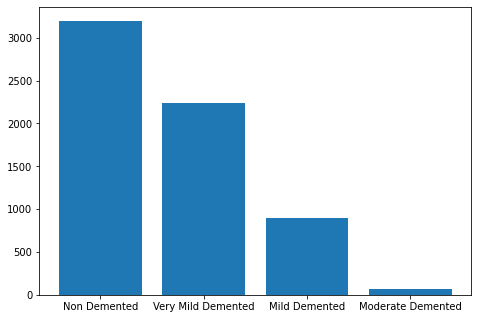

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [len(non_demented), len(very_mild_demented), len(mild_demented), len(moderate_demented)]
class_names = ['Non Demented', 'Very Mild Demented', 'Mild Demented', 'Moderate Demented']
ax.bar(class_names,size)
plt.show()

In [21]:
# np.set_printoptions(threshold=np.inf)
def extract_feature(dir_path, remove_border=True):
    img = mpimg.imread(dir_path)
    if remove_border:
        img = img[10:118, 10:118] # photoshopping some values to avoid gpu going brrr
    img = img / 255.0  # normalize pixel values
    # print(img.shape)
    img = resize(img, (128, 128, 3))  # convert all images to (128x128x3)
    return img

# print(extract_feature("data/Non_Demented/non.jpg"))
all_data =  np.array([extract_feature(filename) for filename in non_demented] + \
            [extract_feature(filename) for filename in mild_demented] + \
            [extract_feature(filename) for filename in moderate_demented] + \
            [extract_feature(filename) for filename in very_mild_demented])
#Fix this later
y = np.array([0] * len(non_demented) + [1] * len(mild_demented) + [2] * len(moderate_demented) + [3] * len(very_mild_demented))
X_train, X_rem, y_train, y_rem = train_test_split(all_data, y, train_size = 0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, train_size = 0.5)
# print(f"Length of training set: {len(X_train)}")
# print(f"Length of validation set: {len(X_valid)}")
# print(f"Length of test set: {len(X_test)}")
X_train_collapse = X_train.reshape(X_train.shape[0], -1)
X_valid_collapse = X_valid.reshape(X_valid.shape[0], -1)
X_test_collapse = X_test.reshape(X_test.shape[0], -1)

In [9]:
# SVM
from sklearn import svm

X_train_collapse_short = X_train_collapse[0:500, :]
X_valid_collapse_short = X_valid_collapse[0:500, :]
X_test_collapse_short = X_test_collapse[0:500, :]
y_train_short = y_train[0:500]
y_valid_short = y_valid[0:500]
y_test_short = y_test[0:500]

# Same feature transformations from before 
# Can try out different kernel functions - linear poly, rbf, sigmoid
# what degree are the models
# what are the different C values that are used
# confusion matrix

svc = svm.SVC(probability=False, kernel="linear")
svc.fit(X_train_collapse_short, y_train_short)

SVC(kernel='linear')

In [ ]:
yhat_train = svc.predict(X_train_collapse_short)
acc = np.mean(yhat_train == y_train)
print('Accuaracy = {0:f}'.format(acc))

yhat_val = svc.predict(X_valid_collapse)
acc = np.mean(yhat_val == y_valid)
print('Accuaracy = {0:f}'.format(acc))

yhat_test = svc.predict(X_test_collapse)
acc = np.mean(yhat_test == y_test)
print('Accuaracy = {0:f}'.format(acc))

/tmp/ipykernel_162623/2107237229.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  acc = np.mean(yhat_train == y_train)


Accuaracy = 0.000000
Accuaracy = 0.660937
Accuaracy = 0.675000


In [ ]:
# Neural Networks (CNN)
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

MRI_model = Sequential()
MRI_model.add()

ImportError: cannot import name 'BatchNormalization' from 'keras.layers.normalization' (/home/aneesh/.local/lib/python3.10/site-packages/keras/layers/normalization/__init__.py)

In [22]:
# Logistic Regression
regularization = "L2"
C = 0.1
grayscale = True
border_transform = True

# activation functions 
print(X_train_collapse.shape)
print(X_valid_collapse.shape) 
print(X_test_collapse.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

#used sag solver, set iterations to 100 first
# class balancing 

logreg = LogisticRegression(max_iter=100, multi_class="multinomial", solver="sag")
logreg.fit(X_train_collapse, y_train)

y_val_pred = logreg.predict(X_valid_collapse)

(5120, 49152)
(640, 49152)
(640, 49152)
(5120,)
(640,)
(640,)


In [ ]:
# Tests

# Also do the logreg classification tests 
# After getting data, can add in confusion matrix
# can visualize with ROC curve (talk about its meaning)

#use f1 score because unbalanced classes
# use weighted bc you want more contribution with the more examples

yhat_train = logreg.predict(X_train_collapse)
acc = np.mean(yhat_train == y_train)
f1 = f1_score(y_train, yhat_train, average='weighted')
print('Accuaracy = {0:f}'.format(acc))
print('F1 = {0:f}'.format(f1))

yhat_val = logreg.predict(X_valid_collapse)
acc = np.mean(yhat_val == y_valid)
f1 = f1_score(yhat_val, y_valid, average='weighted')
print('Accuaracy = {0:f}'.format(acc))
print('F1 = {0:f}'.format(f1))

yhat_test = logreg.predict(X_test_collapse)
acc = np.mean(yhat_test == y_test)
f1 = f1_score(y_test, yhat_test, average='weighted')
print('Accuaracy = {0:f}'.format(acc))
print('F1 = {0:f}'.format(f1))
#Data logging


NameError: name 'logreg' is not defined

In [39]:
# For fun, PCA

In [ ]:
# FOR EVEN MORE FUN, get the average brain scan